# Olympic games Paris 2024 project - Hili Cohen

The Olympic Games are one of the most prestigious sporting events in the world, bringing together athletes from various countries to compete in different sports disciplines. This project aims to analyze Olympic Games data using Python to gain insights into medal distributions, athlete performances, and country rankings.

### **I will focus on my research questions:**

1. Which countries won the most medals overall?
2. Which countries dominated gold medal achievements?
3. What is the gender distribution among Olympic medal winners?
4. How are medals distributed across different sports?
5. How do the top 10 medal-winning countries perform across various sports?

**In this part, I will:**
1. load the data onto python pandas Dataframe.
2. Describe how the data set is built and what the columns in it mean.
3. look for outliers, errors and null values, and treat them accordingly.
4. Remove unnecerray columns for the data analysis, and insert new colums/bulit new merged tables that will help analyze the data.
5. Check if certain columns need to be converted to different datatypes and if they do - convert them to a corrent one.

In [422]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [423]:
#create df variable with data
Teams = pd.read_excel('Data project/Teams.xlsx')  #Contains information about teams
Events = pd.read_excel('Data project/Events.xlsx')  #Contains information about sports events
Countries = pd.read_excel('Data project/Countries.xlsx')  #Country reference table
MH = pd.read_excel('Data project/Medal holders.xlsx') # Medal holders -athletes who won medals  
MT = pd.read_excel('Data project/Medals total.xlsx') #Medal total - summary of total medals by country  

In [424]:
#review data in df (top)
Teams.head()

,team_code,team,team_gender,country_code,country,discipline,disciplines_code,event
0,ARCMTEAM3---CHN01,Peoples Republic of China,M,CHN,China,Archery,ARC,Mens Team
1,ARCMTEAM3---COL01,Colombia,M,COL,Colombia,Archery,ARC,Mens Team
2,ARCMTEAM3---FRA01,France,M,FRA,France,Archery,ARC,Mens Team
3,ARCMTEAM3---GBR01,Great Britain,M,GBR,Great Britain,Archery,ARC,Mens Team
4,ARCMTEAM3---IND01,India,M,IND,India,Archery,ARC,Mens Team


In [425]:
#review data in df (bottom)
Teams.tail()

,team_code,team,team_gender,country_code,country,discipline,disciplines_code,event
1690,WPOWTEAM7---GRE01,Greece,W,GRE,Greece,Water Polo,WPO,Women
1691,WPOWTEAM7---HUN01,Hungary,W,HUN,Hungary,Water Polo,WPO,Women
1692,WPOWTEAM7---ITA01,Italy,W,ITA,Italy,Water Polo,WPO,Women
1693,WPOWTEAM7---NED01,Netherlands,W,NED,Netherlands,Water Polo,WPO,Women
1694,WPOWTEAM7---USA01,United States of America,W,USA,United States,Water Polo,WPO,Women


In [426]:
Teams.info() #viewing some information about the tables for checking if there is any null values,errors or outliers. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team_code         1695 non-null   object
 1   team              1695 non-null   object
 2   team_gender       1695 non-null   object
 3   country_code      1695 non-null   object
 4   country           1695 non-null   object
 5   discipline        1695 non-null   object
 6   disciplines_code  1695 non-null   object
 7   event             1695 non-null   object
dtypes: object(8)
memory usage: 106.1+ KB


In [427]:
Events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   disciplines_code  329 non-null    object
 1   event             329 non-null    object
 2   event_tag         329 non-null    object
 3   sport             329 non-null    object
dtypes: object(4)
memory usage: 10.4+ KB


In [428]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  224 non-null    object
 1   country       224 non-null    object
 2   country_long  224 non-null    object
 3   country_tag   224 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


In [429]:
MH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   medal_type        1044 non-null   object        
 1   medal_code        1044 non-null   int64         
 2   medal_date        1044 non-null   datetime64[ns]
 3   full_name         1044 non-null   object        
 4   gender            1044 non-null   object        
 5   discipline        1044 non-null   object        
 6   disciplines_code  1044 non-null   object        
 7   event             1044 non-null   object        
 8   team_code         1044 non-null   object        
 9   country_code      1044 non-null   object        
 10  country           1044 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 89.8+ KB


In [430]:
MT.info() #it's important to me to review all the Dtype of all the columns on each table. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.4+ KB


## Dataset Overview

The dataset consists of five main tables:
1. **Teams** – Information about participating teams, including gender, country, and event type.
2. **Events** – A list of Olympic events and their respective sports categories.
3. **Countries** – A reference table for country names and codes.
4. **Medalists** – Data on athletes who won medals, including medal type, country, and event.
5. **Medal Summary** – A summary of the total medals won by each country.

Through this analysis, we aim to uncover trends such as which countries dominate specific sports, gender distribution among medalists, and the relationship between team participation and success.

# Data analysis

In [432]:
#some statistics information about "Teams" table: 1695 teams from 104 countries, and 69 events and 4 team gender. 
Teams.describe()

,team_code,team,team_gender,country_code,country,discipline,disciplines_code,event
count,1695,1695,1695,1695,1695,1695,1695,1695
unique,1695,494,4,104,104,28,28,69
top,WPOWTEAM7---USA01,United States of America,W,USA,United States,Swimming,SWM,Mens 4 x 200m Freestyle Relay
freq,1,150,664,171,171,371,371,129


In [433]:
#We need to check what is "team gender".
#we found out - we have two more definitions for team gender and that's necessary information to our gender distribution visualisation.
#The two more genders are: X gender - have to be mixed teams, O gender - open for any gender to compete
Teams["team_gender"].value_counts()

team_gender
W    664
M    646
X    324
O     61
Name: count, dtype: int64

In [434]:
#After that, for another distribution, I Wanted to see how many sports type judged in the Olympic games.
#I made second table and drop the duplicates and count them.  
Events2=Events["sport"].drop_duplicates()
print (Events2.count())

45


In [435]:
#I'm making a pivot table that will use me for the another Visualizatiion.
sport_medals=MH.pivot_table(index='country',columns='discipline', values='medal_code',aggfunc='count',fill_value=0) 

In [436]:
all_countries = MT.sort_values(by="Total",ascending=False)

In [437]:
all_countries.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total
count,92.000000,92.000000,92.000000,92.000000
mean,3.576087,3.586957,4.173913,11.336957
std,6.957064,6.733796,6.537481,19.610648
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,5.000000
75%,3.000000,3.000000,5.000000,9.000000
max,40.000000,44.000000,42.000000,126.000000


In [438]:
all_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 5.0+ KB


# Advanced analysis

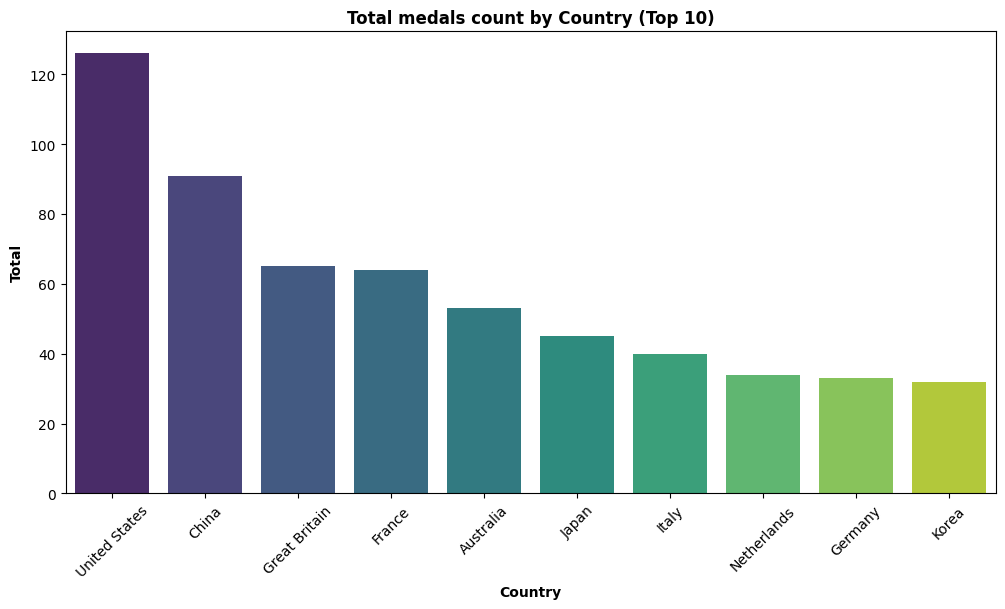

In [439]:
# Graph 1- Visualizing Medal Distribution count by top 10 countries
# Select top 10 countries with the highest total medals - create bar
# sort values from table Medals total (head = top 10)
Top_countries = MT.sort_values(by="Total",ascending=False).head(10)
plt.figure(figsize=(12,6))
sb.barplot(data= Top_countries,x="country", y="Total",hue="country",palette="viridis",legend=False)
plt.title("Total medals count by Country (Top 10)",fontweight= 'bold')
plt.xlabel('Country',fontweight= 'bold')
plt.ylabel('Total',fontweight= 'bold')
plt.xticks(rotation=45)
plt.show()

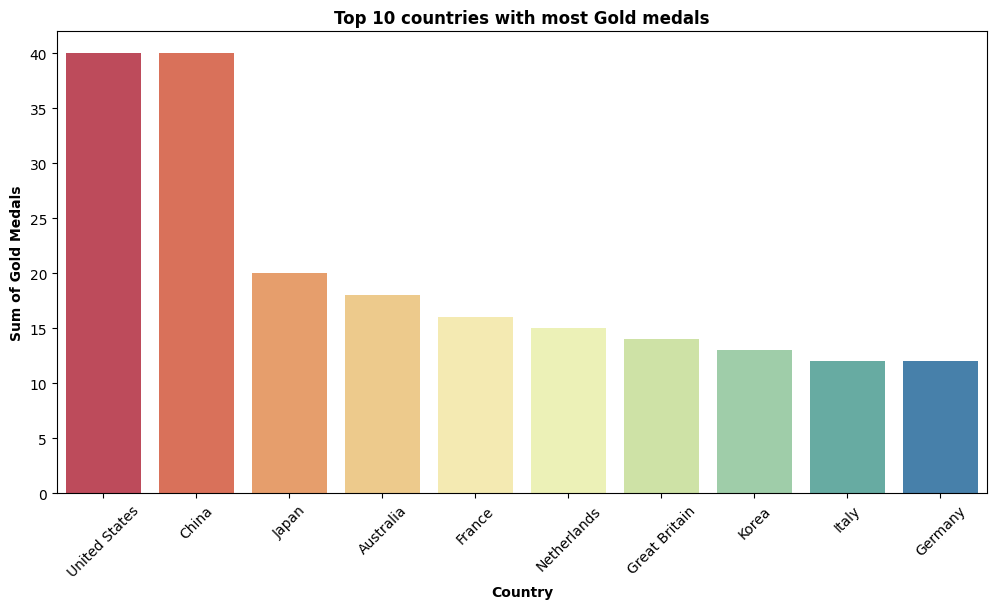

In [440]:
#Graph 2 - Countries with Most Gold Medals (Top 10)
#Making new table which contains the information of the country
Top_gold_countries=MT.sort_values(by='Gold Medal',ascending=False).head(10)

plt.figure(figsize=(12,6))
sb.barplot(data=Top_gold_countries,x='country',y='Gold Medal',hue='country',palette='Spectral',legend=False)
plt.title('Top 10 countries with most Gold medals',fontweight= 'bold')
plt.xlabel('Country',fontweight= 'bold')
plt.ylabel('Sum of Gold Medals',fontweight= 'bold')
plt.xticks(rotation=45)
plt.show()

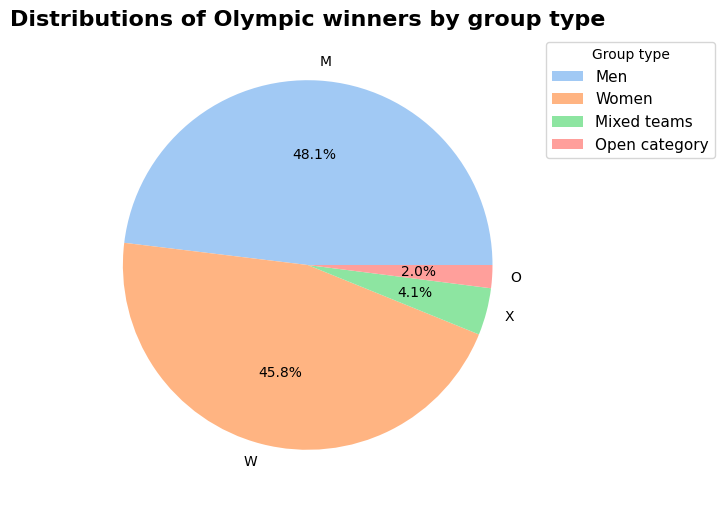

In [441]:
#Graph 3 - Distributions of Olympic winners by group type - Pie chart

gender_distribution=MH["gender"].value_counts()
pcolor=sb.color_palette("pastel")
legend_labels=["Men","Women","Mixed teams","Open category"]

plt.figure(figsize=(6,6))
plt.pie(gender_distribution,labels=gender_distribution.index,autopct= "%1.1f%%",colors=pcolor)
plt.legend(legend_labels,title='Group type',loc="upper left",bbox_to_anchor=(1,1),fontsize=11)
plt.title("Distributions of Olympic winners by group type", fontsize = 16, fontweight= 'bold')
plt.show()

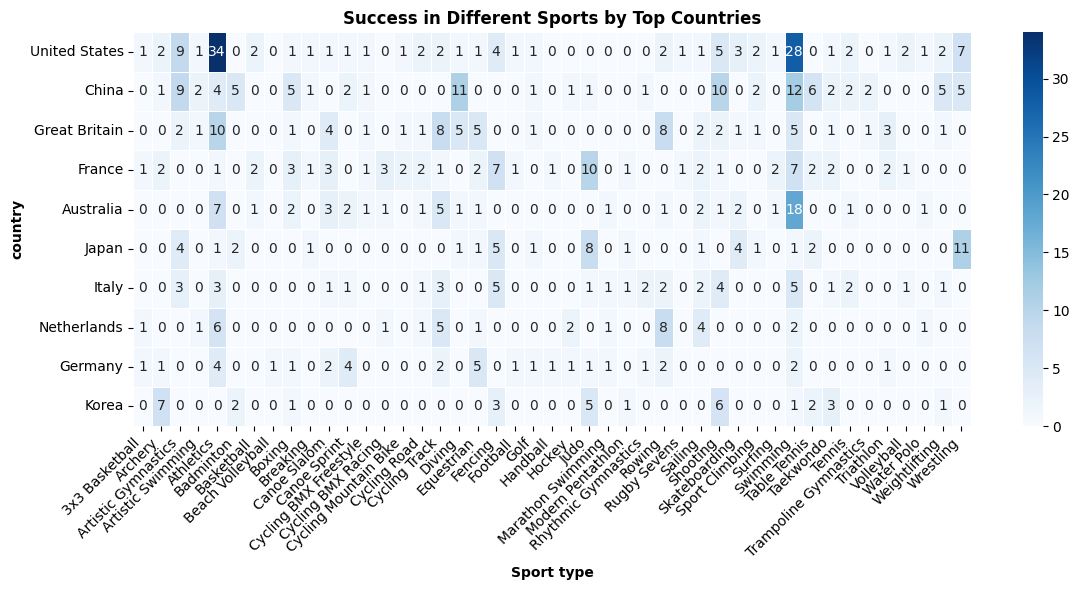

In [442]:
 #Graph 4 - Comparing Top 10 Countries' Success Across Sports
sport_medals=MH.pivot_table(index='country',columns='discipline', values='medal_code',aggfunc='count',fill_value=0)
Top_countries = MT.sort_values(by="Total",ascending=False).head(10)["country"]
sport_medals=sport_medals.loc[Top_countries]

plt.figure(figsize=(12,6))
sb.heatmap(sport_medals,cmap='Blues',annot=True,fmt="d",linewidths=.5)
plt.title("Success in Different Sports by Top Countries",fontsize=12,fontweight='bold')
plt.xlabel("Sport type",fontweight= 'bold')
plt.ylabel("country",fontweight= 'bold')
plt.xticks(rotation=45,fontsize=10,ha='right')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

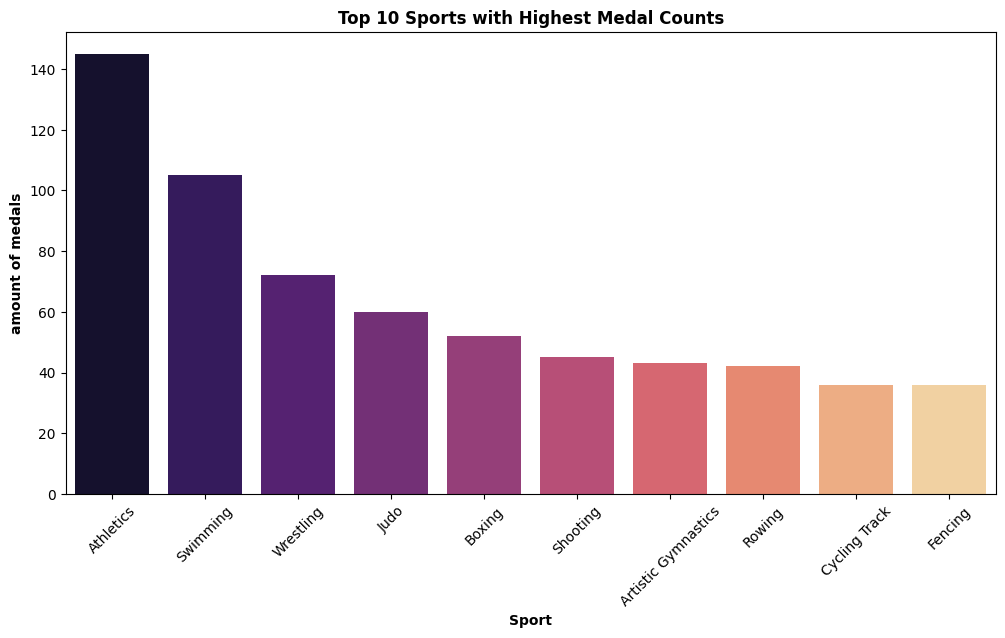

In [443]:
#Graph 5 - Top 10 Sports with Highest Medal Counts
top_sports_medals=MH["discipline"].value_counts().head(10)

plt.figure(figsize=(12,6))
sb.barplot(x=top_sports_medals.index, y=top_sports_medals.values, hue=top_sports_medals.index, palette='magma')
plt.title('Top 10 Sports with Highest Medal Counts',fontweight='bold')
plt.xlabel('Sport',fontweight='bold')
plt.ylabel('amount of medals',fontweight='bold')
plt.xticks(rotation=45)
plt.show

# Conclusions

**Based on our analysis, we have come to the following conclusion:**

1. Countries like **USA, China, and Great Britain** continued to dominate the medal rankings.
   However, while **Great Britain** is still among the top 10 in terms of gold medals, **Japan** has surpassed it and now ranks just behind the USA and China. This shift suggests that Japan has made significant strides in its competitive edge, particularly in securing gold medals.
2. The gender distribution shows that most medals were awarded to men and women, with a **relatively small gap between them**, while mixed and open categories **remain a minor share**. This indicates a trend toward narrowing gender disparities while maintaining the dominance of gender-segregated competitions.
3. Some countries **dominate specific sports** reflecting their strategic investments, For example:
   - **USA** excels in **swimming and athletics**
   - **China** dominates in **swimming and diving**
   - **Japan** shows dominates in **judo and wrestling**
   - Countries like **Great Britain and France** distribute their success across multiple sports without dominance in one specific area.
4. The top 10 countries show specialization in certain sports, indicating strategic focuses and competitive advantages.
5. **Athletics, swimming and wrestling** remain the most medal-abundant sports and saw high concentrations of medals among specific nations.
6. **The Heatmap and Bar Chart comparison show that some countries specialize in only a few sports**, while others perform well across multiple disciplines.


These conclusion and insights can be useful for Sports Analysts & Journalists – To track country performances and historical trends, and for National Olympic Committees – To strategize training and resource allocation. Also, it can be helpful for Athletes & Coaches – To assess competition landscapes and optimize training. 